# 4.　単回帰

## 4.1　散布図に線を引く

- URL : http://kogolab.chillout.jp/elearn/icecream/chap4/sec1.html
- テーマ
   1. データ読み込みと散布図作成

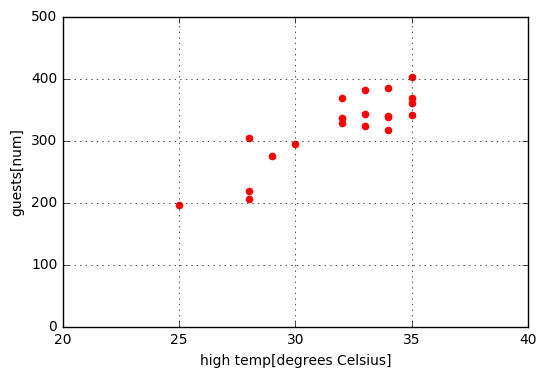

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import lines
import matplotlib.pyplot as plt
from scipy import stats
import math

# csvからデータの読み込み
df_1 = pd.read_csv('./data/chapter4-1.csv')

# 散布図行列を書く
#pd.tools.plotting.scatter_matrix(df_1)

# 散布図を各
plt.xlim([20, 40])
plt.ylim([0, 500])
plt.xlabel('high temp[degrees Celsius]')
plt.ylabel('guests[num]')
plt.grid()
plt.scatter(df_1.high_temp, df_1.guests, marker="o", color="red")

## 4.2　回帰直線の原理

- URL : http://kogolab.chillout.jp/elearn/icecream/chap4/sec2.html
- テーマ
   1. 読み物オンリーページ
       - 回帰直線、最小二乗法
       
## 4.3　回帰直線を求める

- URL : http://kogolab.chillout.jp/elearn/icecream/chap4/sec3.html
- テーマ
   1. 読み物オンリーページ
       - 直線を求めるために必要なのは「傾き」と「切片」
           -  y = ax + b
           
## 4.4　回帰直線を求めてみよう

- URL : http://kogolab.chillout.jp/elearn/icecream/chap4/sec4.html
- テーマ
   1. 回帰直線を求める
       - 「傾き」と「切片」を算出
       - 散布図に回帰直線を描画する
       - 誤差に相当する線も描画する


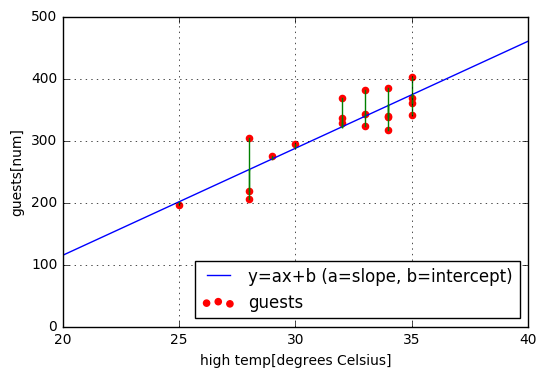

In [2]:
# 回帰直線の傾き、切片、r値、p値を関数で算出
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = stats.linregress(df_1.high_temp, df_1.guests)
#slope, intercept, r_value, p_value, std_err

# X座標=0と50のときのY座標を計算し、2座標を算出
x_1 = [0,  50]
y_1 = [intercept_1, slope_1 * 50 + intercept_1]

# 1個前で表示してる散布図
plt.xlim([20, 40])
plt.ylim([0, 500])
plt.xlabel('high temp[degrees Celsius]')
plt.ylabel('guests[num]')
plt.grid()
plt.scatter(df_1.high_temp, df_1.guests, marker="o", color="red")

# 上で求めた2点間を通る直線を表示(=回帰直線)
plt.plot(x_1, y_1, label='y=ax+b (a=slope, b=intercept)')

# 誤差を縦緑線で表示してみる
for var in range(0, len(df_1)):
    plt.plot([df_1.high_temp[var],df_1.high_temp[var]],[df_1.guests[var],df_1.high_temp[var]*slope_1+intercept_1],"g")

plt.legend(loc='lower right')

## 4.5　（応用編）回帰直線で予測する

- URL : http://kogolab.chillout.jp/elearn/icecream/chap4/sec5.html
- テーマ
   1. 4.4の復習
       - 回帰直線の傾きと切片算出
       - 散布図＆回帰直線のグラフ作成

a(slope)     =  -0.476140442984
b(intercept) =  755.34959721


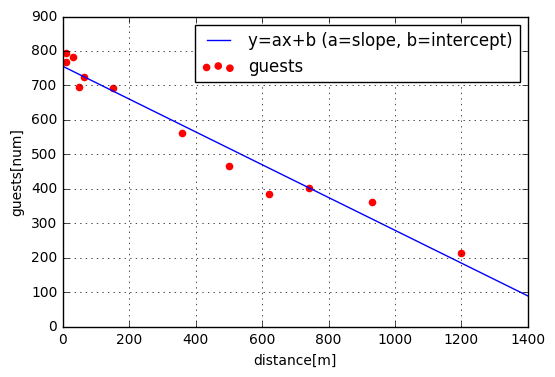

In [3]:
# csvからデータの読み込み
df_2 = pd.read_csv('./data/chapter4-5.csv')

# 回帰直線の傾き、切片、r値、p値を関数で算出
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = stats.linregress(df_2.distance, df_2.guests)

# 散布図作成
plt.xlim([0, 1400])
plt.ylim([0, 900])
plt.xlabel('distance[m]')
plt.ylabel('guests[num]')
plt.grid()
plt.scatter(df_2.distance, df_2.guests, marker="o", color="red")

# 回帰直線作成
x_2 = [0,  1500]
y_2 = [intercept_2, slope_2 * x_2[1] + intercept_2]
plt.plot(x_2, y_2, label='y=ax+b (a=slope, b=intercept)')

# 凡例表示
plt.legend(loc='upper right')

# 傾きと切片表示
print('a(slope)     = ', slope_2)
print('b(intercept) = ', intercept_2)

## 4.6　通過テスト

- URL : http://kogolab.chillout.jp/elearn/icecream/chap4/sec6.html
- テーマ
   1. 4.4、4.5の復習
       - 回帰直線の傾きと切片算出
       - 散布図＆回帰直線のグラフ作成
   2. 求めた回帰直線から、実際に予測を行う

a(slope)     =  0.00806763181226
b(intercept) =  -1.79748736837
score:400     =  1.42956535654
score:500     =  2.23632853776
score:600     =  3.04309171899
score:700     =  3.84985490021


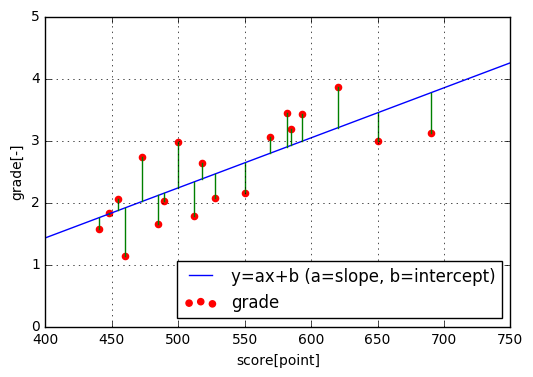

In [4]:
# csvからデータの読み込み
df_3 = pd.read_csv('./data/chapter4-6.csv')

# 回帰直線の傾き、切片、r値、p値を関数で算出
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = stats.linregress(df_3.score, df_3.grade)

# 散布図作成
plt.xlim([400, 750])
plt.ylim([0, 5])
plt.xlabel('score[point]')
plt.ylabel('grade[-]')
plt.grid()
plt.scatter(df_3.score, df_3.grade, marker="o", color="red")

# 回帰直線作成
x_3 = [0, 750]
y_3 = [intercept_3, slope_3 * x_3[1] + intercept_3]
plt.plot(x_3, y_3, label='y=ax+b (a=slope, b=intercept)')

# 凡例表示
plt.legend(loc='lower right')

# 誤差を縦緑線で表示してみる
for var in range(0, len(df_3)):
    plt.plot([df_3.score[var],df_3.score[var]],[df_3.grade[var],df_3.score[var]*slope_3+intercept_3],"g")

# 傾きと切片表示
print('a(slope)     = ', slope_3)
print('b(intercept) = ', intercept_3)

# 回帰直線からの予測値算出
print('score:400     = ', slope_3*400+intercept_3)
print('score:500     = ', slope_3*500+intercept_3)
print('score:600     = ', slope_3*600+intercept_3)
print('score:700     = ', slope_3*700+intercept_3)